# Qualité des données de l'application Cartofriche

## I. Objectif  
Cartofriche est une application recenssant les données des friches en France, celle ci se présentent sous deux formes, une carte interactive affichant:  
• la liste des friches par zones et leur statuts avec projets en cours ou non. avec 14 986 données complétées. et des donnees interactives textuelles complétant les informations.  
• Les données agrégées sous forme de tableau contenant 28115 lignes.  
• Et enfin les données issues des différents observatoires. 7239 lignes  

L'objectif de ce Notebook est de travailler sur la qualités des données, leur complétude les valeurs manquantes les doublons, et afin de préparer les données éventuellement pour les analyses statistiques et pour la modélisation.
De comprendre les incohérences entre les quantités de données entre la carte et les tableaux.

Problématique comment la qualité des données affecte l'éxpérience utilisateur et la pertinence de l'utilisation de l'application?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

df = pd.read_csv(r"C:\Users\rovar\Downloads\friches-standard.csv",sep = ";")

C:\Users\rovar\AppData\Local\Temp\ipykernel_12336\854608870.py:6: DtypeWarning: Columns (35) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r"C:\Users\rovar\Downloads\friches-standard.csv",sep = ";")


## Description des jeux de données 
les données cartofriche sont issues de data.gouv, 
Le dataset comprend les données issues:  
• des données gouvernementales  
• les données issues des observatoires 

Le jeu de donnée gouvernementale comprend 50 colonnes 
'Afin de constituer une base nationale de pré-recensement des friches, le Cerema s'est appuyé sur deux sources de données :

**BASOL** est une base de données nationale sur les sites et sols potentiellement pollués appelant une action des pouvoirs publics, produites par le Ministère de la Transition Ecologique ; les données utilisées sont issues du travail de consolidation de la base réalisé par le collectif Lou Dupont, et diffusé sur data.gouv.fr ;  
**BASIAS** est une base de données de l’inventaire historique des sites industriels et activités de service, produites par le Ministère de la Transition Ecologique et le BRGM ;  les données utilisées sont également issues du travail de consolidation de la base réalisé par le collectif Lou Dupont, et diffusé sur data.gouv.fr.'  

__ref__ https://artificialisation.developpement-durable.gouv.fr/agir-et-etre-accompagne/cartofriches/donnees-utilisees

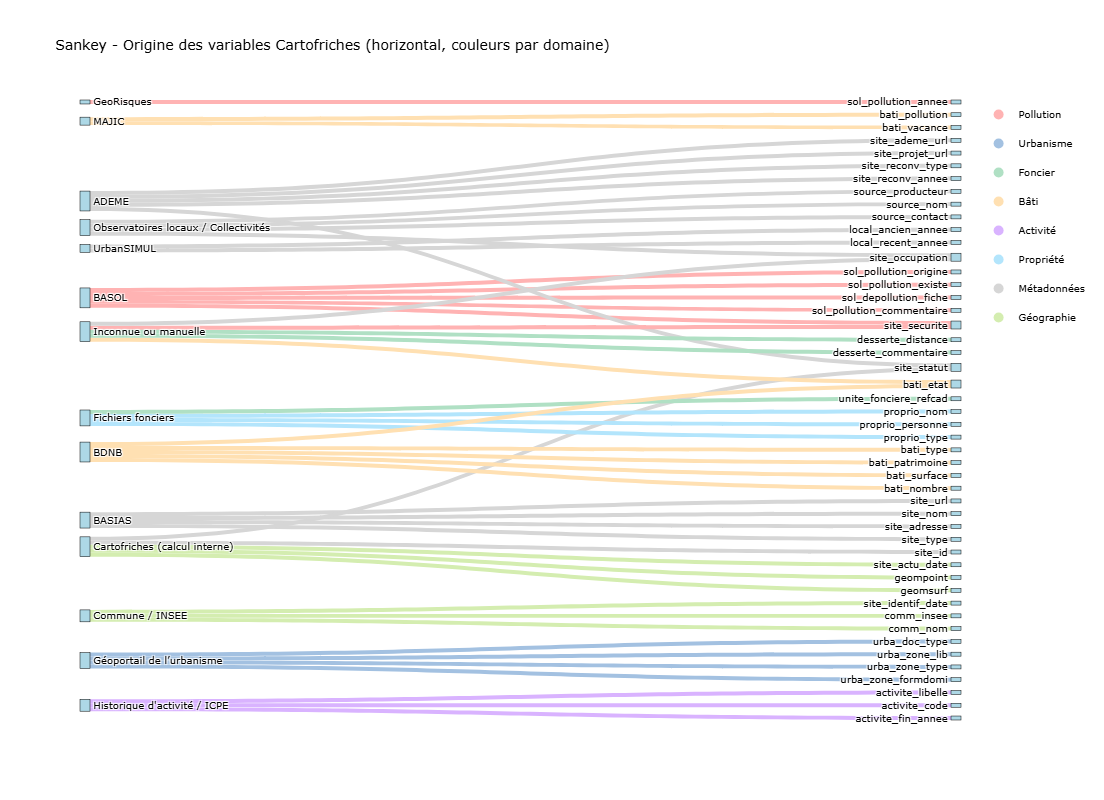

In [72]:
import plotly.graph_objects as go

# Réutilisation des données et des couleurs par domaine
source_variable_links = {
    "BASIAS": ["site_nom", "site_type", "site_adresse", "site_url"],
    "BASOL": ["site_securite", "sol_pollution_existe", "sol_pollution_origine", "sol_pollution_commentaire", "sol_depollution_fiche"],
    "ADEME": ["site_ademe_url", "site_projet_url", "site_reconv_annee", "site_reconv_type", "site_statut"],
    "Cartofriches (calcul interne)": ["site_id", "site_actu_date", "geompoint", "geomsurf", "site_statut"],
    "Fichiers fonciers": ["proprio_type", "proprio_personne", "proprio_nom", "unite_fonciere_refcad"],
    "GeoRisques": ["sol_pollution_annee"],
    "UrbanSIMUL": ["local_ancien_annee", "local_recent_annee"],
    "Géoportail de l’urbanisme": ["urba_zone_type", "urba_zone_lib", "urba_zone_formdomi", "urba_doc_type"],
    "BDNB": ["bati_type", "bati_nombre", "bati_surface", "bati_etat", "bati_patrimoine"],
    "MAJIC": ["bati_pollution", "bati_vacance"],
    "Commune / INSEE": ["comm_nom", "comm_insee", "site_identif_date"],
    "Observatoires locaux / Collectivités": ["source_nom", "source_producteur", "source_contact", "site_occupation"],
    "Historique d'activité / ICPE": ["activite_libelle", "activite_code", "activite_fin_annee"],
    "Inconnue ou manuelle": ["site_securite", "site_occupation", "bati_etat", "desserte_distance", "desserte_commentaire"]
}

domain_colors = {
    "Pollution": "#FFB3B3",
    "Urbanisme": "#A3C1E1",
    "Foncier": "#B0E0C4",
    "Bâti": "#FFE0B2",
    "Activité": "#D9B3FF",
    "Propriété": "#B3E5FC",
    "Métadonnées": "#D6D6D6",
    "Géographie": "#D4EDB0"

}

variable_domains = {
    "site_securite": "Pollution", "sol_pollution_existe": "Pollution", "sol_pollution_origine": "Pollution",
    "sol_pollution_commentaire": "Pollution", "sol_pollution_annee": "Pollution", "sol_depollution_fiche": "Pollution",
    "urba_zone_type": "Urbanisme", "urba_zone_lib": "Urbanisme", "urba_zone_formdomi": "Urbanisme", "urba_doc_type": "Urbanisme",
    "unite_fonciere_refcad": "Foncier", "unite_fonciere_surface": "Foncier", "desserte_distance": "Foncier", "desserte_commentaire": "Foncier",
    "bati_type": "Bâti", "bati_nombre": "Bâti", "bati_surface": "Bâti", "bati_pollution": "Bâti", "bati_vacance": "Bâti",
    "bati_patrimoine": "Bâti", "bati_etat": "Bâti",
    "activite_libelle": "Activité", "activite_code": "Activité", "activite_fin_annee": "Activité",
    "proprio_type": "Propriété", "proprio_personne": "Propriété", "proprio_nom": "Propriété",
    "source_nom": "Métadonnées", "source_url": "Métadonnées", "source_producteur": "Métadonnées", "source_contact": "Métadonnées",
    "site_ademe_url": "Métadonnées", "site_projet_url": "Métadonnées", "site_url": "Métadonnées",
    "comm_nom": "Géographie", "comm_insee": "Géographie", "site_identif_date": "Géographie",
    "site_actu_date": "Géographie", "geompoint": "Géographie", "geomsurf": "Géographie",
    "site_id": "Métadonnées", "site_statut": "Métadonnées", "site_nom": "Métadonnées", "site_type": "Métadonnées",
    "site_adresse": "Métadonnées", "site_occupation": "Métadonnées", "site_reconv_annee": "Métadonnées",
    "site_reconv_type": "Métadonnées"
}

# Création des liens
sources, targets, values, link_colors = [], [], [], []
for source, vars in source_variable_links.items():
    for v in vars:
        sources.append(source)
        targets.append(v)
        values.append(1)
        domain = variable_domains.get(v, "Métadonnées")
        link_colors.append(domain_colors.get(domain, "lightgray"))

labels = list(set(sources + targets))
label_indices = {label: i for i, label in enumerate(labels)}
source_ids = [label_indices[s] for s in sources]
target_ids = [label_indices[t] for t in targets]

# Réduction des labels longs
node_labels = labels

# Création du sankey horizontal avec légende par domaine
fig = go.Figure(data=[go.Sankey(
    orientation='h',
    arrangement="snap",
    node=dict(
        pad=30,
        thickness=10,
        line=dict(color="black", width=0.5),
        label=node_labels,
        color="lightblue",

    ),
    link=dict(
        source=source_ids,
        target=target_ids,
        value=values,
        color=link_colors
    )
)])
# Ajout d'une légende manuelle avec des points invisibles et couleurs visibles
legend_traces = []

for i, (domain, color) in enumerate(domain_colors.items()):
    legend_traces.append(
        go.Scatter(
            x=[None], y=[None],
            mode='markers',
            marker=dict(size=10, color=color),
            legendgroup=domain,
            showlegend=True,
            name=domain
        )
    )

for trace in legend_traces:
    fig.add_trace(trace)

fig.update_layout(
    width=1000,  # largeur augmentée
    height=800,
    title_text="Sankey plus aéré",
)
fig.update_layout(
      # Pour rendre les textes lisibles sur fond noir
)


fig.update_layout(title_text="Sankey - Origine des variables Cartofriches (horizontal, couleurs par domaine)", font_size=10,
                xaxis=dict(showgrid=False, zeroline=False, visible=False),
                yaxis=dict(showgrid=False, zeroline=False, visible=False),
                plot_bgcolor='white',
                paper_bgcolor='white',
                font=dict(color='black'))
fig.write_html("/mnt/data/sankey_cartofriches_horizontal_domaine.html")
fig.show()


## II. Audit Qualité

In [25]:
#Audit qualité
audit_report = []

for col in df.columns:
    series = df[col]
    audit_report.append({
        "Colonne": col,
        "Type": series.dtype,
        "Nb valeurs uniques": series.nunique(dropna=True),
        "Top valeur": series.mode().iloc[0] if not series.mode().empty else None,
        "Fréquence top valeur": series.value_counts(dropna=True).iloc[0] if not series.value_counts(dropna=True).empty else None,
        "Nb de NaN": series.isna().sum(),
        "% de NaN": round(series.isna().mean() * 100, 2)
    })

audit_df = pd.DataFrame(audit_report)
audit_df

Colonne     Type  Nb valeurs uniques  \
0                     site_id   object               28115   
1                    site_nom   object               24071   
2                   site_type   object                  19   
3                site_adresse   object                3713   
4           site_identif_date   object                 581   
5              site_actu_date   object                 532   
6                    site_url   object               16939   
7              site_ademe_url  float64                   0   
8               site_securite   object                   5   
9             site_occupation   object                  20   
10                site_statut   object                   4   
11            site_projet_url  float64                   0   
12          site_reconv_annee  float64                   0   
13           site_reconv_type   object                  13   
14           activite_libelle   object                1617   
15              activite_code   object                 109   
16         activite_fin_annee   object                  73   
17                   comm_nom   object                9390   
18                 comm_insee   object                9138   
19                  bati_type   object                   9   
20                bati_nombre  float64                 106   
21               bati_surface  float64                  15   
22             bati_pollution   object                   4   
23               bati_vacance   object                   5   
24            bati_patrimoine   object                   5   
25                  bati_etat   object                   7   
26         local_ancien_annee  float64                 323   
27         local_recent_annee  float64                 298   
28               proprio_type   object                1344   
29           proprio_personne   object                   4   
30                proprio_nom   object               12738   
31        sol_pollution_annee  float64                   0   
32       sol_pollution_existe   object                   7   
33      sol_pollution_origine   object                   4   
34  sol_pollution_commentaire  float64                   0   
35      sol_depollution_fiche   object                   3   
36     unite_fonciere_surface  float64               17319   
37      unite_fonciere_refcad   object               26511   
38             urba_zone_type   object                  10   
39              urba_zone_lib   object                9058   
40         urba_zone_formdomi   object                  11   
41              urba_doc_type   object                   5   
42          desserte_distance  float64                   0   
43       desserte_commentaire  float64                   0   
44                 source_nom   object                  28   
45                 source_url   object                  12   
46          source_producteur   object                  28   
47             source_contact   object                   5   
48                  geompoint   object               26966   
49                   geomsurf  float64                   0   

                                           Top valeur  Fréquence top valeur  \
0                                         01001_32316                   1.0   
1                                            Décharge                 415.0   
2                                             inconnu               16005.0   
3                                          LE VILLAGE                  30.0   
4                                          2022-10-10               15736.0   
5                                          2022-10-10               15587.0   
6                      https://www.suippes.fr/9143-2/                  14.0   
7                                                None                   NaN   
8                                             inconnu               20132.0   
9                                             inconnu               2

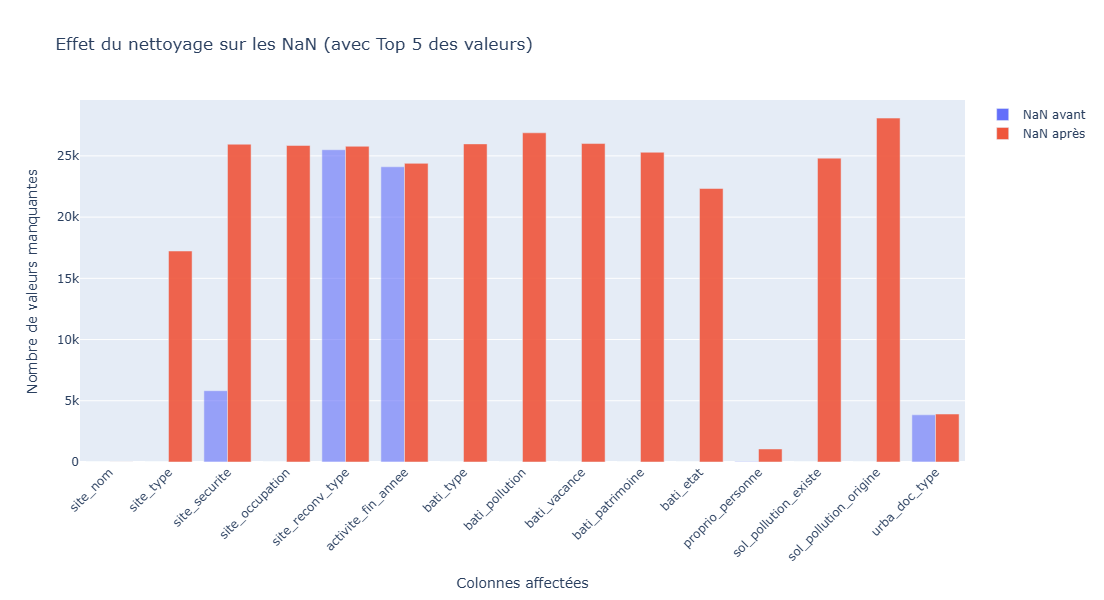

In [59]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go

# 1. Définir les valeurs à remplacer par NaN
valeurs_na = ['None', 'none', 'NONE', 'nan', 'NaN', 'NA', 'na',
              'inconnu', 'Inconnu', 'INCONNU',
              'autre', 'Autre', 'AUTRE']

# 2. Créer une version nettoyée
df_clean = df.replace(valeurs_na, np.nan)

# 3. Nombre de NaN avant et après
na_avant = df.isna().sum()
na_apres = df_clean.isna().sum()

# 4. Calcul des top valeurs (value_counts) pour les tooltips
hover_texts = []
cols_affectees = []

for col in df.columns:
    n_av = na_avant[col]
    n_ap = na_apres[col]
    
    # On ne garde que les colonnes où le nombre de NaN change
    if n_av != n_ap:
        cols_affectees.append(col)
        vc = df[col].value_counts(dropna=True).head(5)
        vc_text = "<br>".join([f"{val} : {cnt}" for val, cnt in vc.items()])
        
        tooltip = (
            f"<b>{col}</b><br>"
            f"NaN avant : {n_av}<br>"
            f"NaN après : {n_ap}<br><br>"
            f"<b>Top valeurs :</b><br>{vc_text}"
        )
        hover_texts.append(tooltip)

# 5. Données finales pour plotly
na_avant_filtered = na_avant[cols_affectees]
na_apres_filtered = na_apres[cols_affectees]

# 6. Création du graphique interactif
fig = go.Figure()

fig.add_trace(go.Bar(
    x=cols_affectees,
    y=na_avant_filtered,
    name='NaN avant',
    hovertext=hover_texts,
    hoverinfo='text',
    marker=dict(opacity=0.6)
))

fig.add_trace(go.Bar(
    x=cols_affectees,
    y=na_apres_filtered,
    name='NaN après',
    hovertext=hover_texts,
    hoverinfo='text',
    marker=dict(opacity=0.9)
))

fig.update_layout(
    title="Effet du nettoyage sur les NaN (avec Top 5 des valeurs)",
    xaxis_title="Colonnes affectées",
    yaxis_title="Nombre de valeurs manquantes",
    barmode='group',
    xaxis_tickangle=-45,
    height=600
)

fig.show()

## Aperçu de la répartition des Valeurs manquantes dans le temps

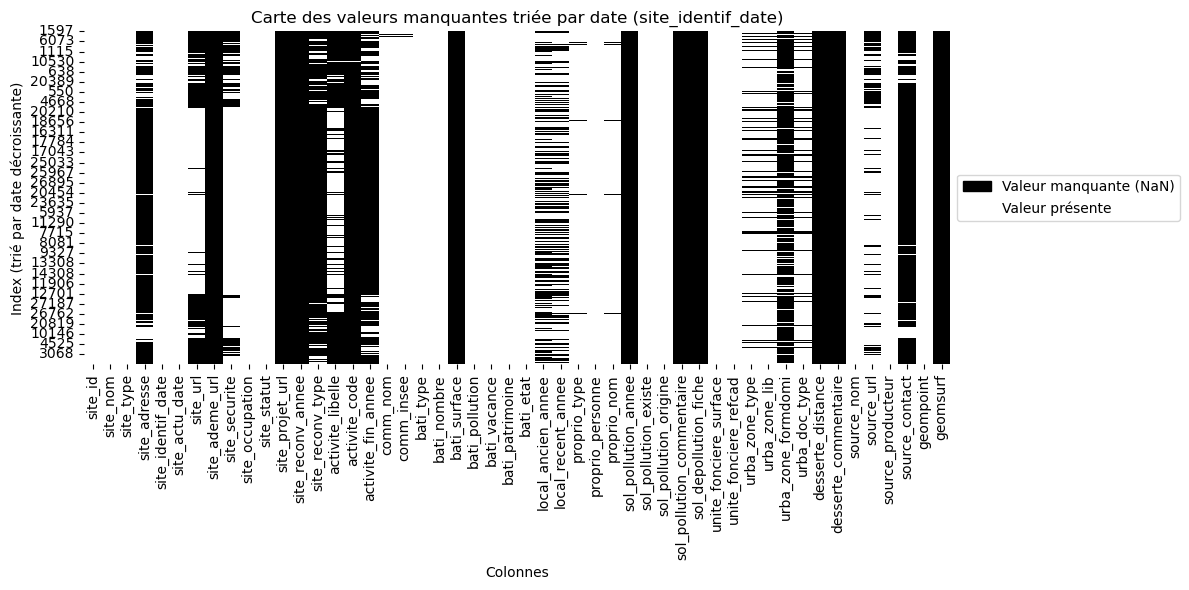

In [29]:
#Valeurs manquantes sur les données gouvernementales
# Conversion de la colonne de date
df["site_identif_date"] = pd.to_datetime(df["site_identif_date"], errors='coerce')

# Tri décroissant par la date
df_sorted = df.sort_values("site_identif_date", ascending=False)

# Carte des valeurs manquantes avec légende personnalisée
plt.figure(figsize=(12, 6))
sns.heatmap(
    df_sorted.isna(),
    cmap=sns.color_palette(["white", "black"]),
    cbar=False
)

# Légende : noir = présent, blanc = manquant
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='black', edgecolor='black', label='Valeur manquante (NaN)'),
    Patch(facecolor='white', edgecolor='white', label='Valeur présente')
]
plt.legend(
    handles=legend_elements,
    loc='center left',
    bbox_to_anchor=(1.0, 0.5)
)


plt.title("Carte des valeurs manquantes triée par date (site_identif_date)")
plt.xlabel("Colonnes")
plt.ylabel("Index (trié par date décroissante)")
plt.tight_layout()
plt.show()

In [34]:
df.columns

Index(['site_id', 'site_nom', 'site_type', 'site_adresse', 'site_identif_date',
       'site_actu_date', 'site_url', 'site_ademe_url', 'site_securite',
       'site_occupation', 'site_statut', 'site_projet_url',
       'site_reconv_annee', 'site_reconv_type', 'activite_libelle',
       'activite_code', 'activite_fin_annee', 'comm_nom', 'comm_insee',
       'bati_type', 'bati_nombre', 'bati_surface', 'bati_pollution',
       'bati_vacance', 'bati_patrimoine', 'bati_etat', 'local_ancien_annee',
       'local_recent_annee', 'proprio_type', 'proprio_personne', 'proprio_nom',
       'sol_pollution_annee', 'sol_pollution_existe', 'sol_pollution_origine',
       'sol_pollution_commentaire', 'sol_depollution_fiche',
       'unite_fonciere_surface', 'unite_fonciere_refcad', 'urba_zone_type',
       'urba_zone_lib', 'urba_zone_formdomi', 'urba_doc_type',
       'desserte_distance', 'desserte_commentaire', 'source_nom', 'source_url',
       'source_producteur', 'source_contact', 'geompoint', 'geo

In [30]:
print(df["site_identif_date"].iloc[20210])
print(df["site_identif_date"].iloc[27187]) 

2022-10-10 00:00:00
2021-12-31 00:00:00


**Commentaire:** Les données ci dessus montrent la répartition des Na dans le temps, on constate une zone entre 12/2021 10/2022 ou la complétude de certainnes données comme **site_url, site_securite, activite_libelle** sont plus importantes
⚠️problématique qui gére ces données, y a t 'il une maintenance automatique y a t'il des observatoires qui complètent moins bien 

#### Feuille de route:
Données gouvernementales (friches-standard.csv)
- les valeurs manquantes 
- ~~doublons~~ à vérifier  par subset 
- unifomisation des features et des types, uniformisation de la casse 
- enrichissement des données : croisement  datasets gouvernementales avec datasets des observatoires
- enrcichissement scrapping gpkg (données textuelles sur l'api) 
- enrichissement avec données textuelles
- enrichissement avec données externes ex( données toxicologiques)
- analyse statistique descriptive et analyse sur l'équilibre des données
- 
#### Brain storm
problèmes rencontrés: arborescence pour accéder aux données annexes (eg trop complexes.
Incohérence des volumes entre les différents datasets carte, enrichies et observatoires -> besoin d'uniformisation pour faciliter la visibilité
Pas assez d'indicateur pour prendre des décisions financieres et extra financieres: besoin d'agrégation 
Pas assez d'indicateur écologique alors que c'est une application faite dans le cadre de l'écologie

## III. ANALYSE DETAILLEE DES VARIABLES

**La complétude et la pertinence** de chaque  variable est analysée dans un premier temps pour évaluer la qualité générale des données fournies par cartofriche et leur provenance: 

In [2]:
#Analyse de typologie 
import pandas as pd
import re

def detect_typo_patterns(series):
    audit = []
    for val in series.dropna().unique():
        val_str = str(val)
        length = len(val_str)
        pattern = re.sub(r'\d', '0', val_str)  # transforme 61214_34555 → 00000_00000
        pattern = re.sub(r'[a-zA-Z]', 'A', pattern)  # si lettres présentes
        pattern = re.sub(r'[^0A_]', 'X', pattern)  # tout autre caractère

        audit.append({
            "Exemple": val_str,
            "Longueur": length,
            "Pattern typologique": pattern,
            "Fréquence": series[series == val].count()
        })

    df_patterns = pd.DataFrame(audit)
    return df_patterns.groupby(["Pattern typologique"]).agg({
        "Exemple": "first",
        "Longueur": "first",
        "Fréquence": "sum"
    }).sort_values("Fréquence", ascending=False).reset_index()


### 1) site_nom

In [35]:
#site_id
detect_typo_patterns(df["site_nom"])

Pattern typologique  \
0                                         00000_00000   
1                                              AAAAAA   
2                                            AXAAAAAA   
3                                            AAAAAAAA   
4                                     AAAAAAAXAAAAAAA   
...                                               ...   
13845                        AAAAAAX00XAAAAAXAAXAAAAA   
13846                        AAAAAAX00XAAAX0XAAXAAAAA   
13847              AAAAAAX00XAAAX0XAAXAAAAAXAAAXAAAAA   
13848                       AAAAAAX00XAAAXAAAAAAXAAAA   
13849  XXXXAAXAAAAAAAAXAAAAAAAAAAAAXAAAXAAAAAAXAAAAAA   

                                              Exemple  Longueur  Fréquence  
0                                         93027_35701        11       1923  
1                                              Friche         6        432  
2                                            Décharge         8        432  
3                                            Sotralec         8        309  
4                                     Elevage avicole        15        272  
...                                               ...       ...        ...  
13845                        Maison 12 route de flers        24          1  
13846                        Terril 39 dit 5 de Noeux        24          1  
13847              Terril 60 dit 2 de Noeux les Mines        34          1  
13848                       Maison 47 rue sainte anne        25          1  
13849  ? / ex Ancienne briquetterie des hautes Terres        46          1  

[13850 rows x 4 columns]

⚠️vérifier pertinence existence site_nom et site_id et redondance, Pourquoi il y a des données de la forme 00000_00000
quels lignes ont tendance a avoir des données manquantes? pourquoi? besoin de standardisé l'entrée des données? 

### 2) site_id

In [21]:
detect_typo_patterns(df["site_id"])

Pattern typologique            Exemple  Longueur  Fréquence
0         00000_00000        61214_34555        11      18750
1          00000_0000         62178_4393        10       8128
2           00000_000          16154_221         9        869
3            AA_00000           NA_35083         8        131
4         0A000_00000        2A028_15474        11        113
5            00000_00           76312_61         8         83
6          0A000_0000         2B185_1532        10         30
7             00000_0            08363_1         7          9
8   00000X00000_00000  54286,54136_35164        17          1
9           0A000_000          2B082_112         9          1

⚠️voir le rapport entre les typologies et la provenance ou signification de la typologie

### 3) site_type

site_type comprend les données des différents types de friches:  
• avec une liste standards avec 19 valeurs différentes,    
• et trois types:  **mixtes, inconnu, autre** qui sont des catégories ambigues qui doivent être clairifiées,  
• peuvent elles être interpolé ou complétees?

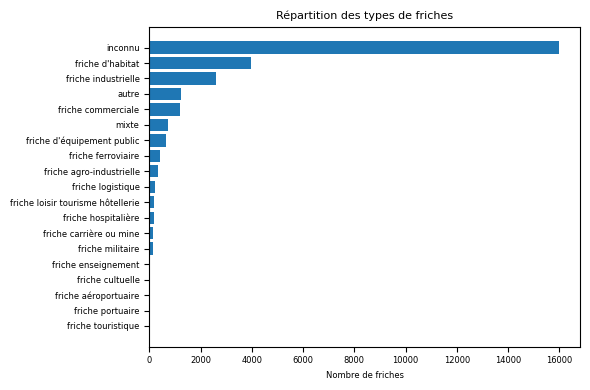

In [24]:
# Comptage des catégories sans 'inconnu'
site_counts = df["site_type"].value_counts()
site_counts = site_counts.sort_values(ascending=True)

plt.figure(figsize=(6, 4))
plt.barh(site_counts.index, site_counts.values)
plt.xlabel("Nombre de friches", fontsize=6)
plt.title("Répartition des types de friches", fontsize=8)
plt.xticks(fontsize=6)
plt.yticks(fontsize=6)
plt.tight_layout()
plt.show()

**Commentaire:** Dans le cadre d'un modèle de machine learning il faudrait réechantilloner cette variable, et dabord résoudre les variables ambigues: comment sont réparties ces variables ambigues -> agrégation.  
🧠il y a t-il un moyen de prédire site_type en fonction des autres features

### 4) site_adress

In [37]:
detect_typo_patterns(df["site_adresse"])

Pattern typologique                    Exemple  Longueur  \
0                    AAXAAAAAAA                 LE VILLAGE        10   
1              000XAAAXAAXAAAAA           259 RUE DE PLAIN        16   
2              00XAAAXAAXAAAAAA           53 RUE DU MOULIN        16   
3            000XAAAXAAXAAAAAAA         159 rue de Mereges        18   
4           000XAAAXAAXAAAAAAAA        273 rue de Bordeaux        19   
...                         ...                        ...       ...   
2092  00XAAAXAAXAXAAAAAXXAAAAAA  33 CHE DE L USINE, SAPOIS        25   
2093       00XAAAXAAXAXAAAAAAAA       11 rue de l'abattoir        20   
2094           00XAAAXAAXAXAAAA           84 rue de l'Etat        16   
2095    00XAAAXAAXAAXAXAAAAAAAA    24 rue de la République        23   
2096       XX0XAAAAXXAAXAAAAAAA     \r\n2 Chem. du Prejour        20   

      Fréquence  
0            46  
1            27  
2            26  
3            25  
4            24  
...         ...  
2092          1  
2093          1  
2094          1  
2095          1  
2096          1  

[2097 rows x 4 columns]

**Commentaire:** la variable site adresse est inhomgène avec 86% de Na des typologies variables, problème de casses, des abréviations dans des cas et d'autres sans abréviation des lieux dits.  
Quels types de friches ont tendance  à ne pas avoir d'adresses? Pourquoi ? réponse partielle, **des friches sur des lieux-dits**

### 5) site_identif_date, site_actu_date

In [48]:
detect_typo_patterns(df["site_identif_date"])

Pattern typologique     Exemple  Longueur  Fréquence
0          0000X00X00  2025-03-05        10      28083
1            00X00X00    16-10-23         8         21
2             0X00X00     6-09-23         7         11

In [58]:
detect_typo_patterns(df["site_actu_date"])

Pattern typologique     Exemple  Longueur  Fréquence
0          0000X00X00  2025-03-05        10      28115

In [88]:
print(df.loc[mask_bad_date, "source_nom"].value_counts())
print(df.loc[mask_bad_date, "source_url"].value_counts())

source_nom
DDT de la Haute-Marne           29
Appel à projet Fonds Friches     3
Name: count, dtype: int64
source_url
https://www.haute-marne.gouv.fr/index.php/Actions-de-l-Etat/Amenagement-du-territoire-urbanisme/Observatoire-departemental-des-friches    29
https://www.economie.gouv.fr/plan-de-relance/profils/collectivites/fonds-pour-le-recyclage-des-friches                                     3
Name: count, dtype: int64


In [152]:
#réinitialisation
import pandas as pd 
import numpy as np
from datetime import datetime
df = pd.read_csv(r"C:\Users\rovar\Downloads\friches-standard.csv",sep = ";")

C:\Users\rovar\AppData\Local\Temp\ipykernel_21896\215976473.py:5: DtypeWarning:

Columns (35) have mixed types. Specify dtype option on import or set low_memory=False.



#### Nettoyage des colonnes de dates et gestions des outliers 

In [109]:
# Nettoyage de site_identif_date
def clean_site_identif(val):
    if pd.isna(val) or not isinstance(val, str) or 'X' in val:
        return pd.NaT
    val = val.strip()
    if len(val) == 10:
        # Format standard AAAA-MM-JJ
        try:
            return pd.to_datetime(val, format="%Y-%m-%d")
        except:
            return pd.NaT
    elif len(val) in [7, 8]:
        # Format JJ-MM-AA ou J-MM-AA
        try:
            return pd.to_datetime(val, format="%d-%m-%y")
        except:
            return pd.NaT
    else:
        return pd.NaT

In [110]:
def clean_site_actu(val):
    if pd.isna(val) or not isinstance(val, str):
        return pd.NaT
    val = val.strip()

    # Cas anormal du type 0006-09-23 → on reforme une date correcte
    if val[:2] == "00":
        try:
            parts = val.split('-')
            if len(parts) != 3:
                return pd.NaT
            day = parts[0][-2:]       # ex: 0006 → 06
            month = parts[1]
            year = parts[2]           # ex: 23
            corrected = f"{year}-{month.zfill(2)}-{day.zfill(2)}"
            return pd.to_datetime(corrected, format="%y-%m-%d", errors="raise")
        except:
            return pd.NaT
    else:
        # cas normal en AAAA-MM-JJ
        try:
            return pd.to_datetime(val, format="%Y-%m-%d", errors="raise")
        except:
            return pd.NaT

In [111]:
# Application
df['site_identif_date'] = df['site_identif_date'].apply(clean_site_identif)
df['site_actu_date'] = df['site_actu_date'].apply(clean_site_actu)

In [117]:
# Calcul du délai en jours
df["délai_maj"] = (df["site_actu_date"] - df["site_identif_date"]).dt.days

# Filtrer les valeurs aberrantes (négatives)
outliers_date = df[df["délai_maj"] < 0]

In [119]:
df[["site_actu_date", "site_identif_date","délai_maj"]].describe()

site_actu_date              site_identif_date  \
count                          28115                          28115   
mean   2023-01-09 03:55:02.422194176  2022-02-20 04:40:12.889916672   
min              2014-01-01 00:00:00            1900-12-31 00:00:00   
25%              2022-10-10 00:00:00            2022-10-10 00:00:00   
50%              2022-10-10 00:00:00            2022-10-10 00:00:00   
75%              2024-01-30 00:00:00            2022-10-10 00:00:00   
max              2025-04-07 00:00:00            2031-12-01 00:00:00   
std                              NaN                            NaN   

          délai_maj  
count  28115.000000  
mean     322.968629  
min    -2848.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max    44969.000000  
std     1811.575284

In [118]:
outliers_date

site_id                                           site_nom  \
16468  37027_21675  Appel à projet Recyclage Foncier 2021 3ième éd...   
19623  37027_20243  Appel à projet Fonds Vert 2023 -BLERE "Square ...   
25567  37104_25534  Appel à projet Fonds Vert 2023 -ESVRES "Rue du...   

              site_type site_adresse site_identif_date site_actu_date  \
16468  friche d'habitat          NaN        2031-12-01     2024-02-13   
19623             mixte          NaN        2031-12-01     2024-02-13   
25567             mixte          NaN        2031-12-01     2024-02-13   

      site_url  site_ademe_url site_securite site_occupation  ...  \
16468      NaN             NaN       inconnu         inconnu  ...   
19623      NaN             NaN       inconnu         inconnu  ...   
25567      NaN             NaN       inconnu         inconnu  ...   

      urba_doc_type  desserte_distance  desserte_commentaire  \
16468          PLUI                NaN                   NaN   
19623          PLUI                NaN                   NaN   
25567           PLU                NaN                   NaN   

                         source_nom  \
16468  Appel à projet Fonds Friches   
19623  Appel à projet Fonds Friches   
25567  Appel à projet Fonds Friches   

                                              source_url  \
16468  https://www.economie.gouv.fr/plan-de-relance/p...   
19623  https://www.economie.gouv.fr/plan-de-relance/p...   
25567  https://www.economie.gouv.fr/plan-de-relance/p...   

                  source_producteur source_contact  \
16468  Appel à projet Fonds Friches            NaN   
19623  Appel à projet Fonds Friches            NaN   
25567  Appel à projet Fonds Friches            NaN   

                        geompoint geomsurf délai_maj  
16468  POINT (0.9920944 47.32845)      NaN     -2848  
19623  POINT (0.9927726 47.32828)      NaN     -2848  
25567  POINT (0.7889918 47.28532)      NaN     -2848  

[3 rows x 51 columns]

In [39]:
outliers_date

site_id                                           site_nom  \
16468  37027_21675  Appel à projet Recyclage Foncier 2021 3ième éd...   
19623  37027_20243  Appel à projet Fonds Vert 2023 -BLERE "Square ...   
25567  37104_25534  Appel à projet Fonds Vert 2023 -ESVRES "Rue du...   

              site_type site_adresse site_identif_date site_actu_date  \
16468  friche d'habitat          NaN        2031-12-01     2024-02-13   
19623             mixte          NaN        2031-12-01     2024-02-13   
25567             mixte          NaN        2031-12-01     2024-02-13   

      site_url  site_ademe_url site_securite site_occupation  ...  \
16468      NaN             NaN       inconnu         inconnu  ...   
19623      NaN             NaN       inconnu         inconnu  ...   
25567      NaN             NaN       inconnu         inconnu  ...   

      desserte_commentaire                    source_nom  \
16468                  NaN  Appel à projet Fonds Friches   
19623                  NaN  Appel à projet Fonds Friches   
25567                  NaN  Appel à projet Fonds Friches   

                                              source_url  \
16468  https://www.economie.gouv.fr/plan-de-relance/p...   
19623  https://www.economie.gouv.fr/plan-de-relance/p...   
25567  https://www.economie.gouv.fr/plan-de-relance/p...   

                  source_producteur source_contact  \
16468  Appel à projet Fonds Friches            NaN   
19623  Appel à projet Fonds Friches            NaN   
25567  Appel à projet Fonds Friches            NaN   

                        geompoint geomsurf site_actu_date_raw  \
16468  POINT (0.9920944 47.32845)      NaN         2024-02-13   
19623  POINT (0.9927726 47.32828)      NaN         2024-02-13   
25567  POINT (0.7889918 47.28532)      NaN         2024-02-13   

      site_identif_date_raw délai_maj  
16468               1-12-31   -2848.0  
19623               1-12-31   -2848.0  
25567               1-12-31   -2848.0  

[3 rows x 53 columns]

📊 Moyenne des délais (≤ 45000 jours) : 184.09 jours
🔹 Médiane : 0 jours
± Écart type : 829.99 jours
📈 Nombre de points : 27859 / 27859


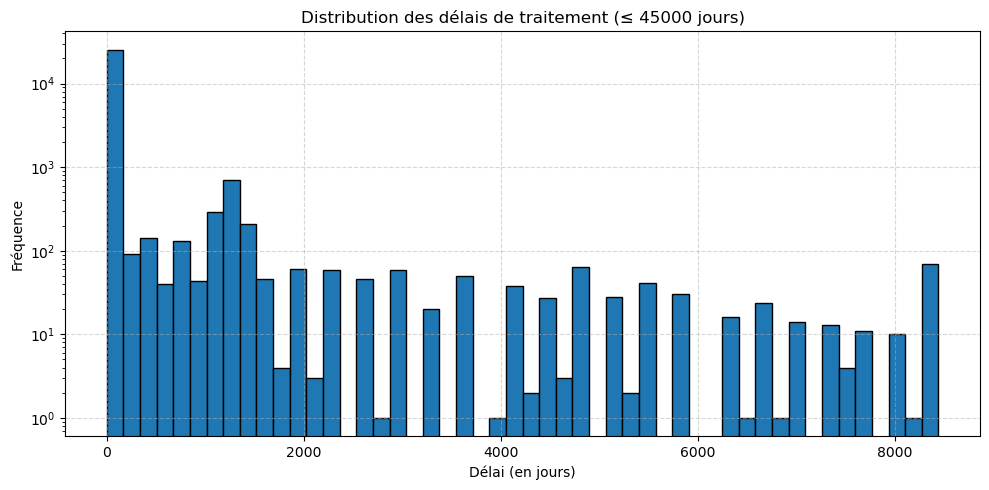

In [132]:
import pandas as pd
import matplotlib.pyplot as plt

# Calcul du délai
df['delai_jours'] = (df['site_actu_date'] - df['site_identif_date']).dt.days

# Filtrage : dates valides entre 2000 et 2025 + délai positif
mask_valid = (
    df['site_identif_date'].dt.year.between(2000, 2025) &
    df['site_actu_date'].dt.year.between(2000, 2025) &
    df['delai_jours'].notna()
)

df_valid = df.loc[mask_valid]

# Définir une fenêtre de délai raisonnable (ex : 0 à 45000 jours) 
delai_max = 45000
df_windowed = df_valid[df_valid['delai_jours'].between(0, delai_max)]

# Statistiques sur la fenêtre sélectionnée
mean_ = df_windowed['delai_jours'].mean()
median_ = df_windowed['delai_jours'].median()
std_ = df_windowed['delai_jours'].std()

print(f"📊 Moyenne des délais (≤ {delai_max} jours) : {mean_:.2f} jours")
print(f"🔹 Médiane : {median_:.0f} jours")
print(f"± Écart type : {std_:.2f} jours")
print(f"📈 Nombre de points : {len(df_windowed)} / {len(df_valid)}")

# Histogramme
plt.figure(figsize=(10, 5))
df_windowed['delai_jours'].hist(bins=50, edgecolor='black')
plt.title(f"Distribution des délais de traitement (≤ {delai_max} jours)")
plt.xlabel("Délai (en jours)")
plt.ylabel("Fréquence")
plt.yscale("log")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


Ces variables sont les seules variables temporielles que l'on a elles indiquent la date de saisie des données et leurs mises a jour site_actu date est un bon indicateur de la qualité de la maintenance du site.  
On peut estimer le délai de mise a jour moyen des données, et aussi la récurence de ces mises à jour, il nous manquerai juste une information si jamais il y a des mises a jour multiples.
On peut aussi déterminer la fréquence des mises à jour.

In [43]:
df["site_actu_date"] = pd.to_datetime(df["site_actu_date"], errors='coerce')

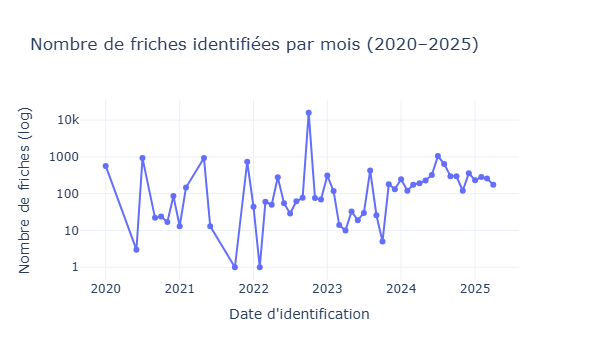

In [139]:
import plotly.express as px

# Filtrage sur les dates entre 2020 et 2025
mask_years = df["site_identif_date"].dt.year.between(2020, 2025)
df_filtered = df.loc[mask_years].copy()

# Agrégation par mois
df_filtered['periode'] = df_filtered['site_identif_date'].dt.to_period('M').dt.to_timestamp()

# Comptage par mois
agg = df_filtered['periode'].value_counts().sort_index().reset_index()
agg.columns = ['Date', 'Nombre de friches']

# Plot avec échelle log
fig = px.line(
    agg,
    x='Date',
    y='Nombre de friches',
    title='Nombre de friches identifiées par mois (2020–2025)',
    markers=True
)

fig.update_layout(
    xaxis_title="Date d'identification",
    yaxis_title="Nombre de friches (log)",
    yaxis_type='log',
    template="plotly_white"
)

fig.show()

**Commentaire:** Il y a une activité importante en 2022 avec un ajout de 15859 lignes,  les 5 plus  grands fournisseurs de données sur cette période sont:
| Description                                               | Nombre |
|-----------------------------------------------------------|--------|
| Site Basias ou Basol non vérifié par le Cerema            | 12906  |
| Friche étude Ademe 2021                                   |   925  |
| Site Basias ou Basol vérifié par le Cerema en 2020        |   845  |
| Friche étude Ademe 2021, intéressante pour du PV au sol   |   698  |


## 6) source des donnees

dans cette partie nous nous interesserons aux sources des données 
|colonne              |               Description de la colonne|
|---------------------|-------------------------------------------------|
|site_url	          |URL du site, ou de la fiche BASOL ou BASIAS|
|site_ademe_url	      |URL de la fiche lorsque le site a fait l'objet d'une intervention de l'ADEME|
|site_projet_url	  |Lien vers un projet associé (rare)|
|source_nom	          |Nom de la source ayant permis l’identification du site|
|source_url	          |Lien vers la source (ex. data.gouv.fr, etc.)|
|source_producteur	  |Nom de la structure ou auteur|
|source_contact	      |Email de contact de la donnée|
|sol_depollution_fiche|Lien vers une fiche BRGM (pollution)|

In [153]:
# Colonnes liées aux sources et URLs
colonnes_sources = [
    'site_url',
    'site_ademe_url',
    'site_projet_url',
    'source_nom',
    'source_url',
    'source_producteur',
    'source_contact',
    'sol_depollution_fiche'
]
total = len(df)

# Audit qualité
audit = []
for col in colonnes_sources:
    non_na = df[col].notna().sum()
    pct = (non_na / total * 100) if total > 0 else 0
    audit.append({
        'Colonne': col,
        'Valeurs non nulles': non_na,
        'Complétion (%)': round(pct, 2),
        'Total': total
    })

df_audit_sources = pd.DataFrame(audit).sort_values(by='Complétion (%)', ascending=False).reset_index(drop=True)
df_audit_sources

Colonne  Valeurs non nulles  Complétion (%)  Total
0             source_nom               28115          100.00  28115
1      source_producteur               28115          100.00  28115
2             source_url               21475           76.38  28115
3               site_url               16995           60.45  28115
4         source_contact                2336            8.31  28115
5  sol_depollution_fiche                   3            0.01  28115
6         site_ademe_url                   0            0.00  28115
7        site_projet_url                   0            0.00  28115

**Commentaire:** les Colonnes source_nom 

In [154]:
df['source_nom'].value_counts(dropna=False)

source_nom
Site Basias ou Basol non vérifié par le Cerema                             12906
EPF Normandie                                                               4170
Appel à projet Fonds Friches                                                2998
Grand Angoulême                                                             2185
EPF Grand Est                                                               1460
Friche étude Ademe 2021                                                      925
Site Basias ou Basol vérifié par le Cerema en 2020                           845
Friche étude Ademe 2021, intéressante pour du PV au sol                      698
DDT de la Somme                                                              493
urban vitaliz                                                                230
DDT de l'Ain                                                                 207
Institut Paris Région                                                        163
Communauté de Com

In [155]:
df['source_nom_simpl'] = df['source_nom'].str.extract(
    r"(Basias|Basol|Ademe|Cerema)", expand=False
).fillna("Autre")
df['source_nom_simpl'].value_counts()


source_nom_simpl
Basias    13751
Autre     12624
Ademe      1623
Cerema      117
Name: count, dtype: int64

⚠️ essayer de chercher les données ici pour la pollution des sols:
https://www.georisques.gouv.fr/consulter-les-dossiers-thematiques/dossier-expert-sur-les-sites-et-sols-potentiellement-pollues

In [162]:
df['site_url'].value_counts().loc[lambda x: x > 1]

site_url
https://www.suippes.fr/9143-2/                                                                                                                                                                              14
https://fiches-risques.brgm.fr/georisques/basias-detaillee/LRO6602417                                                                                                                                       13
https://fiches-risques.brgm.fr/georisques/basias-detaillee/NA                                                                                                                                               10
https://www.google.com/maps/@45.5922396,0.1766609,3a,72.8y,317.09h,84.27t/data=!3m6!1e1!3m4!1smpDybbJGI3Por8GFLoUS9Q!2e0!7i13312!8i6656?authuser=0&entry=ttu                                                 3
https://www.google.com/maps/@45.6578379,0.1552262,3a,49y,83.63h,93.82t/data=!3m6!1e1!3m4!1sgj9hSYBAmVZzjbX3ozeMvQ!2e0!7i16384!8i8192?authuser=0&entry=ttu          

 # Pollution
 Champ Champ Description Description  
 sol_pollution_annee Année de constation de la pollution dans BASOL  
 sol_pollution_existe Existence de pollution du sol  
 sol_pollution_origine Origine de la pollution du sol  
 sol_pollution_commentaire Commentaire décrivant la pollution, le cas échéant  
 sol_depollution_fiche Lien vers la fiche de dépollution si elle est présente dans  

## Analyse  de la qualité du Dataset avec des "colonnes obligatoires"

In [24]:
# Liste exacte des colonnes obligatoires selon Cartofriches
colonnes_obligatoires = [
    "site_id", "site_nom", "site_type",
    "site_identif_date", "site_actu_date",
    "comm_nom", "comm_insee",
    "source_nom", "geompoint"
]

# Chargement uniquement de ces colonnes
df_obligatoires = pd.read_csv(
    r"C:\Users\rovar\Downloads\friches-standard.csv",
    sep=";",                      # adapte si besoin
    usecols=colonnes_obligatoires,
    encoding="utf-8-sig",         # change si tu as des caractères bizarres
    low_memory=False
)

df_obligatoires.head(5)

site_id           site_nom            site_type site_identif_date  \
0  61214_34555  rue de la garenne     friche d'habitat        2025-03-05   
1  57097_23384           Sotralec  friche industrielle        2022-01-01   
2  93027_35701        93027_35701                autre        2025-04-07   
3  80126_24311        80126_24311                mixte        2023-08-17   
4  61386_34635        Les Futiaux     friche d'habitat        2024-08-13   

  site_actu_date                          comm_nom comm_insee  \
0     2025-03-05                           L'Aigle      61214   
1     2022-01-01                    BOULAY-MOSELLE      57097   
2     2025-04-07                      La Courneuve      93027   
3     2023-08-17                      BOUTTENCOURT      80126   
4     2024-08-13  Saint-Evroult-Notre-Dame-du-Bois      61386   

              source_nom                   geompoint  
0          EPF Normandie  POINT (0.6256966 48.76207)  
1          EPF Grand Est    POINT (6.49563 49.17622)  
2  Institut Paris Région   POINT (2.413969 48.93915)  
3        DDT de la Somme    POINT (1.60458 49.94721)  
4          EPF Normandie  POINT (0.4367191 48.79385)

In [25]:
#valeurs manquantes sur les colonnes obligatoires:
df_obligatoires.isna().sum()
#Redéfinir pourquoi les colonnes sont obligatoires

site_id                0
site_nom               0
site_type              0
site_identif_date      0
site_actu_date         0
comm_nom             132
comm_insee           132
source_nom             0
geompoint              0
dtype: int64

In [26]:
# Vérification des lignes manquantes
missing_comm_nom = df_obligatoires["comm_nom"].isnull()
missing_comm_insee = df_obligatoires["comm_insee"].isnull()

# Vérifie si les lignes sont les mêmes
same_missing = (missing_comm_nom == missing_comm_insee).all()
matching_indices = df_obligatoires[missing_comm_nom & missing_comm_insee].index.tolist()

print("Les lignes manquantes sont-elles identiques :", same_missing)
print("Nombre de lignes concernées :", len(matching_indices))

Les lignes manquantes sont-elles identiques : True
Nombre de lignes concernées : 132


ref : https://www.bing.com/search?pglt=297&q=urbansimul&cvid=82b30ecbddb849a39757db90987acd2d&gs_lcrp=EgRlZGdlKgYIABBFGDkyBggAEEUYOTIGCAEQABhAMgYIAhAAGEAyBggDEAAYQDIGCAQQABhA0gEIMTU3MGowajGoAgCwAgA&FORM=ANNTA1&PC=DCTS

## Annexe
🔍 Sigles fréquents et leur signification
|Sigle|	Nom complet|	Rôle principal|
|-----|------------|------------------|
|EPF	|Établissement Public Foncier	|Opérateur foncier public (rachète, gère, réhabilite les friches)
|DDT	|Direction Départementale des Territoires	|Services de l’État à l’échelle départementale (aménagement, foncier, urbanisme)
|DREAL	|Direction Régionale de l’Environnement, de l’Aménagement et du Logement	|Coordination régionale pour l'environnement, urbanisme, risques
|ADEME	|Agence de la Transition Écologique	|Études et accompagnement sur les friches, pollutions, reconversions
|BRGM	|Bureau de Recherches Géologiques et Minières	|Expertise sol, pollution, géorisques ; édite les fiches pollution
|CEREMA	|Centre d'Études et d'Expertise sur les Risques, l’Environnement, la Mobilité et l’Aménagement	|Appui technique aux territoires (carto, friches, observatoires)
|IGN	|Institut national de l'information géographique et forestière	|Fournisseur de données spatiales et cartographiques
|ANCT	|Agence Nationale de la Cohésion des Territoires	|Soutien aux collectivités pour l'aménagement, la reconversion
|DEAL	|Direction de l’Environnement, de l’Aménagement et du Logement (en Outre-mer)	|Équivalent DREAL dans les DOM-TOM
|Insee	|Institut national de la statistique et des études économiques	|Données démographiques, socio-éco, INSEE codes (communes, etc.)
|Basias	|Base de données des Anciens Sites Industriels et Activités de Service	|Inventaire des sites industriels potentiellement pollués
|Basol	|Base des Sites et Sols Pollués	|Sites nécessitant une action de l’État ou un suivi réglementaire
|Cartofriche	|Plateforme de visualisation des friches	|Portail de consultation des données Cerema, ADEME, etc.
|Géorisques	|Portail d'information sur les risques naturels et technologiques	|Données BRGM, fiches pollution, mouvements de terrain, etc.

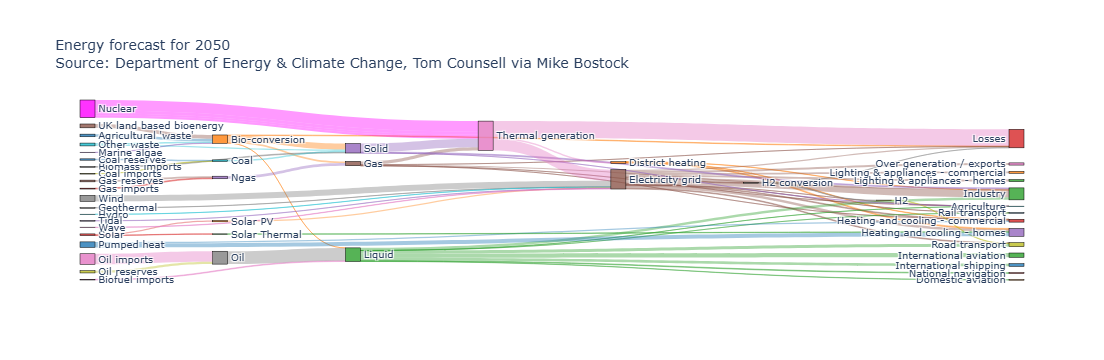

In [58]:
import plotly.graph_objects as go
import urllib, json

url = 'https://raw.githubusercontent.com/plotly/plotly.js/master/test/image/mocks/sankey_energy.json'
response = urllib.request.urlopen(url)
data = json.loads(response.read())

# Override gray link colors with 'source' colors
opacity = 0.4
data['data'][0]['node']['color'] = ['rgba(255,0,255, 0.8)' if color == "magenta" else color for color in data['data'][0]['node']['color']]
data['data'][0]['link']['color'] = [data['data'][0]['node']['color'][src].replace("0.8", str(opacity)) for src in data['data'][0]['link']['source']]

fig = go.Figure(data=[go.Sankey(
valueformat=".0f",
valuesuffix="TWh",
node=dict(
pad=15,
thickness=15,
line=dict(color="black", width=0.5),
label=data['data'][0]['node']['label'],
color=data['data'][0]['node']['color']
),
link=dict(
source=data['data'][0]['link']['source'],
target=data['data'][0]['link']['target'],
value=data['data'][0]['link']['value'],
label=data['data'][0]['link']['label'],
color=data['data'][0]['link']['color']
)
)])

fig.update_layout(title_text="Energy forecast for 2050<br>Source: Department of Energy & Climate Change, Tom Counsell via <a href='https://bost.ocks.org/mike/sankey/'>Mike Bostock</a>", font_size=10)
fig.show()